In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
Cell_data = pd.read_parquet('data/CycleMeetsExpressions/cell_data_full.parquet')

In [3]:
Cell_data = Cell_data.dropna(subset=['Phase'])

In [4]:
genes = list(Cell_data.columns[4:-1])
phases = set(Cell_data['Phase'].unique())
pseudotime = set(Cell_data['pseudotime_proxy'].unique())

In [5]:
# Calculate which genes have the highest mean and maximal expression per pseudotime interval

staple_genes_pseudotime_means = {}
staple_genes_pseudotime_maxs = {}
for t in pseudotime:
    _df = Cell_data[Cell_data['pseudotime_proxy']==t][genes]
    means = _df.mean().sort_values(ascending=False)[0:1]
    maxs = _df.max().sort_values(ascending=False)[0:1]
    staple_genes_pseudotime_means[int(t)] = means.index[0]
    staple_genes_pseudotime_maxs[int(t)] = maxs.index[0]

In [6]:
# Calculate which genes have the highest mean and maximal expression per cell cycle phase

staple_genes_phases_means = {}
staple_genes_phases_maxs = {}

for phase in phases:
    _df = Cell_data[Cell_data['Phase']==phase][genes]
    means = _df.mean().sort_values(ascending=False)[0:5]
    maxs = _df.max().sort_values(ascending=False)[0:5]
    staple_genes_phases_means[phase] = list(means[0:5].index)
    staple_genes_phases_maxs[phase] = list(maxs[0:5].index)

In [7]:
# obtain unique gene identifiers 

staple_genes_phases_maxs_list = list(set([x for xs in list(staple_genes_phases_maxs.values())for x in xs]))
staple_genes_phases_means_list = list(set([x for xs in list(staple_genes_phases_means.values())for x in xs]))

In [8]:
selected_genes1 = Cell_data[list(Cell_data.columns[0:4])+staple_genes_phases_maxs_list]
selected_genes2 = Cell_data[list(Cell_data.columns[0:4])+staple_genes_phases_means_list]
# convert the dataframe from white to long

selected_genes1 = selected_genes1.melt(id_vars=list(Cell_data.columns[:4]),
                                       value_vars=staple_genes_phases_maxs_list,
                                       var_name='gene',
                                       value_name='expression [RNAseq]',
                                       ignore_index=True)

selected_genes2 = selected_genes2.melt(id_vars=list(Cell_data.columns[:4]),
                                     value_vars=staple_genes_phases_means_list,
                                     var_name='gene',
                                     value_name='expression [RNAseq]',
                                     ignore_index=True)

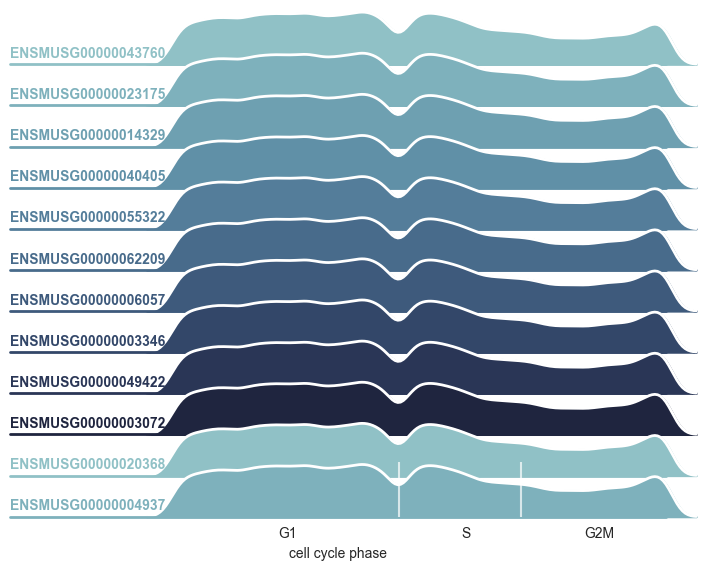

In [9]:
sns.set_style(style='white', rc={'axes.facecolor': (0,0,0,0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
    selected_genes1,
    row='gene',
    hue='gene',
    aspect=15,
    height=.5,
    palette=pal
)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'pseudotime_proxy',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'pseudotime_proxy', clip_on=False, color='w', lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle='-', color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color,
            ha='left', va='center', transform=ax.transAxes)


g.map(label, 'pseudotime_proxy')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(xlim=(-15,44))
g.set(yticks=[], ylabel='')
g.set(xticks=[10,26,38], xlabel='cell cycle phase')
g.set(xticklabels=['G1', 'S', 'G2M'])

plt.axvline(x=20, c='white',lw=1.5, alpha=.7)
plt.axvline(x=31, c='white',lw=1.5, alpha=.7)

g.despine(bottom=True, left=True)

plt.savefig('Figs/Example_genes_MaxPerPhase.png',
            bbox_inches='tight')

C:\Users\ngl\OneDrive\Documents\GitHub\BioAI_Team8\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ngl\OneDrive\Documents\GitHub\BioAI_Team8\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ngl\OneDrive\Documents\GitHub\BioAI_Team8\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ngl\OneDrive\Documents\GitHub\BioAI_Team8\venv\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to

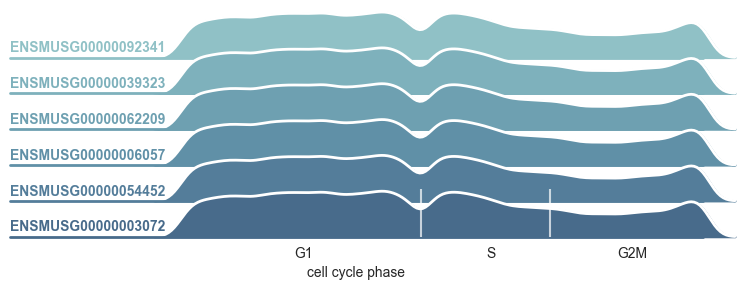

In [10]:
sns.set_style(style='white', rc={'axes.facecolor': (0,0,0,0)})

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(
    selected_genes2,
    row='gene',
    hue='gene',
    aspect=15,
    height=.5,
    palette=pal
)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'pseudotime_proxy',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, 'pseudotime_proxy', clip_on=False, color='w', lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle='-', color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color,
            ha='left', va='center', transform=ax.transAxes)


g.map(label, 'pseudotime_proxy')

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(xlim=(-15,44))
g.set(yticks=[], ylabel='')
g.set(xticks=[10,26,38], xlabel='cell cycle phase')
g.set(xticklabels=['G1', 'S', 'G2M'])

plt.axvline(x=20, c='white',lw=1.5, alpha=.7)
plt.axvline(x=31, c='white',lw=1.5, alpha=.7)

g.despine(bottom=True, left=True)

# plt.savefig('Figs/Example_genes_MaxPerPhase.png',
#             bbox_inches='tight')